# Mini Project 5-4 Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [30]:
# Import relevant packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [18]:
# Import data

aqi = pd.read_csv('c4_epa_air_quality.csv', index_col = 0)
aqi = aqi.dropna()

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [19]:
aqi.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6
10,2018-01-01,Minnesota,Dakota,Rosemount,Flint Hills Refinery 420,Carbon monoxide,Parts per million,0.247368,3


In [52]:
# Code Here
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        257 non-null    object 
 1   state_name        257 non-null    object 
 2   county_name       257 non-null    object 
 3   city_name         257 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    257 non-null    object 
 6   units_of_measure  257 non-null    object 
 7   arithmetic_mean   257 non-null    float64
 8   aqi               257 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.1+ KB


In [11]:
aqi['state_name'].describe()

count            257
unique            51
top       California
freq              66
Name: state_name, dtype: object

**Question:** What time range does this data cover?

In [12]:
aqi['date_local'].describe()

count            257
unique             1
top       2018-01-01
freq             257
Name: date_local, dtype: object

A: Just January 1st, 2018

**Question:** What are the minimum and maximum AQI values observed in the dataset?

In [15]:
aqi['aqi'].describe()

count    257.000000
mean       6.782101
std        7.091422
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       50.000000
Name: aqi, dtype: float64

A : min = 0, max = 50

**Question:** Are all states equally represented in the dataset?

In [51]:
aqi['state_name'].describe()

count            257
unique            51
top       California
freq              66
Name: state_name, dtype: object

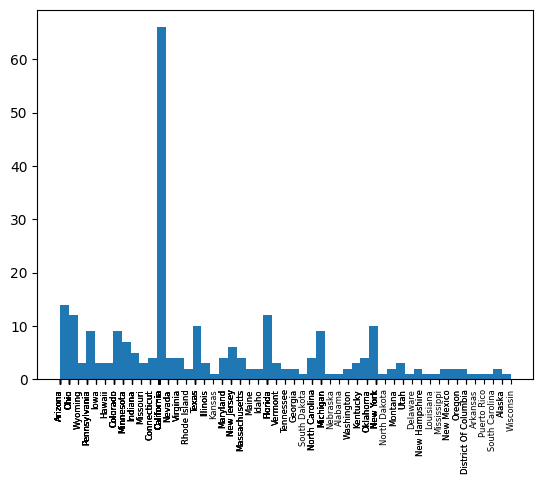

In [71]:
plt.hist(aqi['state_name'], bins = 51)
plt.xticks(aqi['state_name'], rotation = 90, fontsize = 6)
plt.show()

A: No, not all states are equally represented.

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [76]:
# Summarize the mean AQI for RRE states.
# Create a list of RRE states.

rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Compute the mean AQI for each RRE state
aqi_rre_mean = aqi_rre.groupby('state_name')['aqi'].mean().reset_index()

# Display the result
print(aqi_rre_mean)


     state_name        aqi
0    California  12.121212
1       Florida   5.500000
2      Michigan   8.111111
3          Ohio   3.333333
4  Pennsylvania   3.000000
5         Texas   2.700000


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

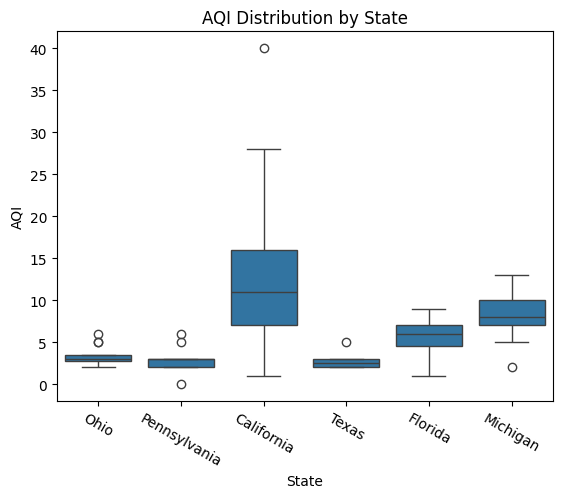

In [83]:
import seaborn as sns

# Create a boxplot for AQI distributions by state
sns.boxplot(data=aqi_rre, x='state_name', y='aqi')

# label the plot
plt.xticks(rotation=-30)  # Rotate state labels for readability
plt.xlabel('State')
plt.ylabel('AQI')
plt.title('AQI Distribution by State')

# Show the plot
plt.show()

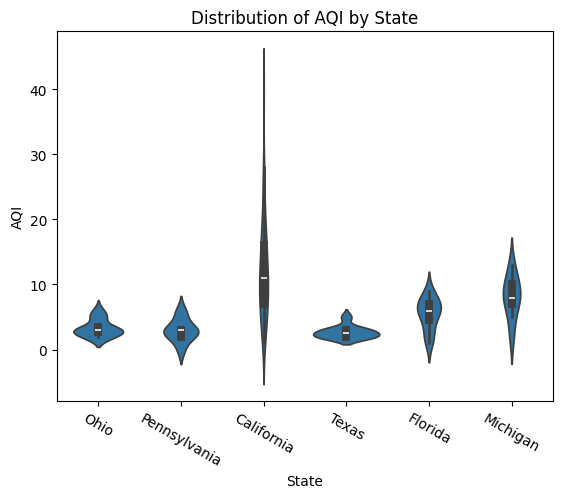

In [84]:
# Create a violin plot to show the distribution of AQI by state
sns.violinplot(data=aqi_rre, x='state_name', y='aqi', inner='box')

# label the plot
plt.xticks(rotation=-30)  # Rotate labels for readability
plt.xlabel('State')
plt.ylabel('AQI')
plt.title('Distribution of AQI by State')

# Show the plot in-line
plt.show()

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

A: California and maybe Michigan

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for CA.

In [85]:
# Find the mean aqi for CA state.

mean_aqi_ca = aqi_rre[aqi_rre['state_name'] == 'California']['aqi'].mean()
print("Mean AQI for California:", mean_aqi_ca)

Mean AQI for California: 12.121212121212121


### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [15]:
# Input your confidence level here:

# 95%

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [87]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96
aqi_ca = aqi_rre[aqi_rre['state_name'] == 'California']['aqi']


# Next, calculate your standard error.

n = len(aqi_ca)
se = np.std(aqi_ca, ddof=1) / np.sqrt(n)

# Lastly, use the preceding result to calculate your margin of error.

me = z_value * se

print("Margin of Error (95% Confidence):", me)

Margin of Error (95% Confidence): 1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [92]:
# Calculate your confidence interval (upper and lower limits).

upper_me_limit = mean_aqi_ca + me
lower_me_limit = mean_aqi_ca - me

print(f'CI (95%): [{round(lower_me_limit, 4)}, {round(upper_me_limit, 4)}]')

CI (95%): [10.3597, 13.8827]


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [100]:
from scipy import stats



## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [101]:
# Define confidence level (95%)
confidence_level = 0.95

# Compute confidence interval using scipy
ci_lower, ci_upper = stats.norm.interval(confidence_level, loc=mean_aqi_ca, scale=se)

# Display results
print(f"Confidence Interval (95%): [{round(ci_lower, 4)}, {round(ci_upper, 4)}]")

Confidence Interval (95%): [10.3598, 13.8827]


# Considerations

**What are some key takeaways that you learned from this project?**

A: helped me understand air quality variability and the role of confidence intervals in reflecting uncertainty. learned how to make boxplots and violin plots to communicate AQI distribution.

**What findings would you share with others?**

A: Air quality varies significantly across states, and the margin of error highlights uncertainty in data interpretation. For example california has the highest mean AQI, but due to the variability in AQI, is has the largest confidence interval. 

**What would you convey to external readers?**

A: That it is important to asses the risk high AQI pose to public health and that can be addressed through assessments like these

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 